# Cybersecurity Threat Analysis


### vendor_project: The name of the vendor project associated with the vulnerability. (String)
### product: The name of the product associated with the vulnerability. (String)
### vulnerability_name: The name of the vulnerability. (String)
### date_added: The date the vulnerability was added to the CISA Known Exploited Vulnerabilities catalog. (Date)
### short_description: A brief description of the vulnerability. (String)
### required_action: The action required to remediate the vulnerability. (String)
### due_date: The date by which the required action must be completed. (Date)
### notes: Additional notes about the vulnerability. (String)
### grp: The group associated with the vulnerability. (String)
### pub_date: The date the vulnerability was published. (Date)
### cvss: The Common Vulnerability Scoring System score associated with the vulnerability. (Float)
### cwe: The Common Weakness Enumeration associated with the vulnerability. (String)
### vector: The vector associated with the vulnerability. (String)
### complexity: The complexity associated with the vulnerability. (String)
### severity: The severity level associated with the vulnerability. (String)

In [231]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [232]:
df=pd.read_csv('cybersecurity.csv')

# Data Exploration

In [233]:
df.head()

,cve_id,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,notes,grp,pub_date,cvss,cwe,vector,complexity,severity
0,CVE-2021-27104,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-78,NETWORK,LOW,CRITICAL
1,CVE-2021-27102,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,7.8,CWE-78,LOCAL,LOW,HIGH
2,CVE-2021-27101,accellion,FTA,Accellion FTA SQL Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-89,NETWORK,LOW,CRITICAL
3,CVE-2021-27103,accellion,FTA,Accellion FTA SSRF Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-918,NETWORK,LOW,CRITICAL
4,CVE-2021-21017,adobe,Acrobat and Reader,Adobe Acrobat and Reader Heap-based Buffer Ove...,2021-11-03,Acrobat Reader DC versions versions 2020.013.2...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-11,8.8,CWE-787,NETWORK,LOW,HIGH


In [234]:
df.tail()

,cve_id,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,notes,grp,pub_date,cvss,cwe,vector,complexity,severity
769,CVE-2009-0563,microsoft,Office,Microsoft Office Buffer Overflow Vulnerability,2022-06-08,Microsoft Office contains a buffer overflow vu...,Apply updates per vendor instructions.,2022-06-22,NaN,37,2009-06-10,NaN,CWE-119,NaN,NaN,NaN
770,CVE-2009-0557,microsoft,Office,Microsoft Office Object Record Corruption Vuln...,2022-06-08,Microsoft Office contains an object record cor...,Apply updates per vendor instructions.,2022-06-22,NaN,37,2009-06-10,NaN,CWE-94,NaN,NaN,NaN
771,CVE-2008-0655,adobe,Acrobat and Reader,Adobe Acrobat and Reader Unspecified Vulnerabi...,2022-06-08,Adobe Acrobat and Reader contains an unespecif...,Apply updates per vendor instructions.,2022-06-22,NaN,37,2008-02-07,NaN,NVD-CWE-noinfo,NaN,NaN,NaN
772,CVE-2007-5659,adobe,Acrobat and Reader,Adobe Acrobat and Reader Buffer Overflow Vulne...,2022-06-08,Adobe Acrobat and Reader contain a buffer over...,Apply updates per vendor instructions.,2022-06-22,NaN,37,2008-02-12,NaN,CWE-119,NaN,NaN,NaN
773,CVE-2006-2492,microsoft,Word,Microsoft Word Malformed Object Pointer Vulner...,2022-06-08,Microsoft Word and Microsoft Works Suites cont...,Apply updates per vendor instructions.,2022-06-22,NaN,37,2006-05-20,NaN,NVD-CWE-Other,NaN,NaN,NaN


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cve_id              774 non-null    object 
 1   vendor_project      774 non-null    object 
 2   product             773 non-null    object 
 3   vulnerability_name  774 non-null    object 
 4   date_added          774 non-null    object 
 5   short_description   768 non-null    object 
 6   required_action     774 non-null    object 
 7   due_date            774 non-null    object 
 8   notes               0 non-null      float64
 9   grp                 774 non-null    int64  
 10  pub_date            765 non-null    object 
 11  cvss                609 non-null    float64
 12  cwe                 760 non-null    object 
 13  vector              609 non-null    object 
 14  complexity          609 non-null    object 
 15  severity            609 non-null    object 
dtypes: float

In [236]:
df.isna().sum()

cve_id                  0
vendor_project          0
product                 1
vulnerability_name      0
date_added              0
short_description       6
required_action         0
due_date                0
notes                 774
grp                     0
pub_date                9
cvss                  165
cwe                    14
vector                165
complexity            165
severity              165
dtype: int64

In [237]:
print('shape of the data- ', df.shape)
print('size of the data- ', df.size)

shape of the data-  (774, 16)
size of the data-  12384


In [238]:
# Descriptive Statistics comparision
describe=df.describe()
describe

,notes,grp,cvss
count,0.0,774.000000,609.000000
mean,NaN,13.434109,8.422496
std,NaN,12.225148,1.301657
min,NaN,1.000000,3.100000
25%,NaN,1.000000,7.800000
50%,NaN,16.000000,8.800000
75%,NaN,20.000000,9.800000
max,NaN,37.000000,10.000000


In [239]:
describe.drop(columns='notes',axis=1, inplace=True)
describe.drop('count',axis=0,inplace=True)
describe

,grp,cvss
mean,13.434109,8.422496
std,12.225148,1.301657
min,1.000000,3.100000
25%,1.000000,7.800000
50%,16.000000,8.800000
75%,20.000000,9.800000
max,37.000000,10.000000


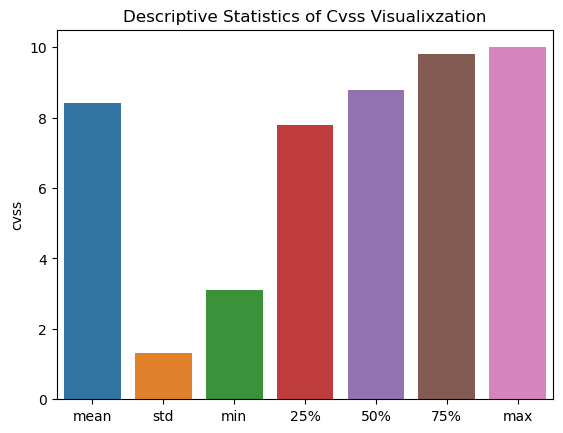

In [240]:
sns.barplot(x=describe.index, y=describe['cvss'])
plt.title('Descriptive Statistics of Cvss Visualixzation')
plt.show()

In [241]:
df.corr()

,notes,grp,cvss
notes,NaN,NaN,NaN
grp,NaN,1.000000,-0.062406
cvss,NaN,-0.062406,1.000000


In [242]:
df.skew()

notes         NaN
grp      0.515606
cvss    -0.819088
dtype: float64

        values
grp   0.515606
cvss -0.819088


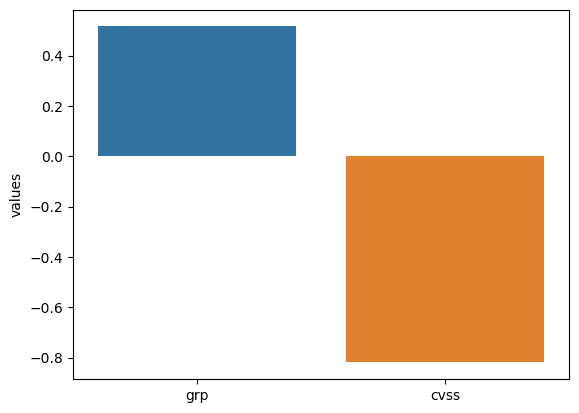

In [243]:
skew=pd.DataFrame(df.skew())
skew.rename(columns={0:'values'},inplace=True)
skew.drop('notes',axis=0,inplace=True)
print(skew)

sns.barplot(x=skew.index, y=skew['values'])
plt.show()

# Pre-processing
### Correcting the missing values and deleting unnecessary columns

In [244]:
df.isna().sum()

cve_id                  0
vendor_project          0
product                 1
vulnerability_name      0
date_added              0
short_description       6
required_action         0
due_date                0
notes                 774
grp                     0
pub_date                9
cvss                  165
cwe                    14
vector                165
complexity            165
severity              165
dtype: int64

In [245]:
# cve_id column
df['cve_id'].value_counts()

CVE-2021-27104    1
CVE-2016-6277     1
CVE-2020-9054     1
CVE-2020-7247     1
CVE-2020-5410     1
                 ..
CVE-2020-8467     1
CVE-2020-8468     1
CVE-2020-24557    1
CVE-2020-8599     1
CVE-2006-2492     1
Name: cve_id, Length: 774, dtype: int64

In [246]:
# better to drop cve_id column
df.drop(columns='cve_id',axis=1,inplace=True)

# -----------------------------------------------------------------------------------------------------------

In [247]:
# product column
df['product'].value_counts()

Windows                                   78
Flash Player                              29
Internet Explorer                         24
Win32k                                    20
Chromium V8 Engine                        20
                                          ..
Microsoft Desktop Window Manager (DWM)     1
vRealize Operations Manager API            1
System Information Library for Node.JS     1
BIG-IP Traffic Management Microkernel      1
Acrobat and Reader, Flash Player           1
Name: product, Length: 346, dtype: int64

In [248]:
df[df['product'].isna()]

,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,notes,grp,pub_date,cvss,cwe,vector,complexity,severity
305,fuel cms,NaN,Fuel CMS SQL Injection Vulnerability,2021-12-10,FUEL CMS 1.4.7 allows SQL Injection via the co...,Apply updates per vendor instructions.,2022-06-10,NaN,4,2020-08-13,9.8,CWE-89,NETWORK,LOW,CRITICAL


In [249]:
# filling the null value with heighest occured value that is Windows
df['product'].fillna('Windows',inplace=True)

# -----------------------------------------------------------------------------------------------------------

In [250]:
# short_description column
df['short_description'].value_counts()

A vulnerability in Cisco Small Business RV160, RV260, RV340, and RV345 Series Routers could allow an attacker to do any of the following: Execute arbitrary code elevate privileges, execute arbitrary commands, bypass authentication and authorization protections, fetch and run unsigned software, or cause a denial of service (DoS).                                         5
The Simple Network Management Protocol (SNMP) subsystem of Cisco IOS and IOS XE contains a vulnerability that could allow an authenticated, remote attacker to remotely execute code.                                                                                                                                                                                              4
Microsoft Win32k contains an unspecified vulnerability that allows for privilege escalation.                                                                                                                                                                  

In [251]:
df[df['short_description'].isna()]

,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,notes,grp,pub_date,cvss,cwe,vector,complexity,severity
10,android,Android OS,"Android ""AbstractEmu"" Root Access Vulnerabilities",2021-11-03,NaN,Apply updates per vendor instructions.,2022-05-03,NaN,1,2019-10-11,7.8,CWE-416,LOCAL,LOW,HIGH
11,android,Android OS,"Android ""AbstractEmu"" Root Access Vulnerabilities",2021-11-03,NaN,Apply updates per vendor instructions.,2022-05-03,NaN,1,2020-03-10,7.8,CWE-787,LOCAL,LOW,HIGH
12,android,Android OS,"Android ""AbstractEmu"" Root Access Vulnerabilities",2021-11-03,NaN,Apply updates per vendor instructions.,2022-05-03,NaN,1,2020-03-10,7.8,CWE-787,LOCAL,LOW,HIGH
26,apple,iOS and macOS,Apple iOS and macOS Memory Corruption Vulnerab...,2021-11-03,NaN,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-10-19,7.8,NVD-CWE-noinfo,LOCAL,LOW,HIGH
105,google,Chromium V8 Engine,Google Chromium V8 Insufficient Input Validati...,2021-11-03,NaN,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-11-23,6.1,CWE-20,NETWORK,LOW,MEDIUM
106,google,Chromium V8 Engine,Google Chromium V8 Incorrect Implementation Vu...,2021-11-03,NaN,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-11-23,8.8,CWE-787,NETWORK,LOW,HIGH


In [252]:
df['short_description'].dropna(axis=0,inplace=True)

# -----------------------------------------------------------------------------------------------------------

In [253]:
# notes column
df['notes'].value_counts()

Series([], Name: notes, dtype: int64)

In [254]:
# since the entire column is empty it is better to drop the column
df.drop(columns='notes',axis=1,inplace=True)

# -----------------------------------------------------------------------------------------------------------

In [255]:
# pub_date column
df['pub_date'].value_counts()

2018-03-28    15
2017-03-17    13
2021-09-08     8
2017-09-29     8
2019-04-09     7
              ..
2017-12-12     1
2022-01-04     1
2019-08-01     1
2019-03-21     1
2006-05-20     1
Name: pub_date, Length: 477, dtype: int64

In [256]:
df[df['pub_date'].isna()]

,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,grp,pub_date,cvss,cwe,vector,complexity,severity
478,mozilla,Firefox,Mozilla Firefox Use-After-Free Vulnerability,2022-03-07,Mozilla Firefox contains a use-after-free vuln...,Apply updates per vendor instructions.,2022-03-21,17,NaN,NaN,NaN,NaN,NaN,NaN
479,mozilla,Firefox,Mozilla Firefox Use-After-Free Vulnerability,2022-03-07,Mozilla Firefox contains a use-after-free vuln...,Apply updates per vendor instructions.,2022-03-21,17,NaN,NaN,NaN,NaN,NaN,NaN
570,google,Chromium V8,Google Chromium V8 Type Confusion Vulnerability,2022-03-28,The vulnerability exists due to a type confusi...,Apply updates per vendor instructions.,2022-04-18,20,NaN,NaN,NaN,NaN,NaN,NaN
610,apple,macOS,Apple macOS Out-of-Bounds Write Vulnerability,2022-04-04,macOS Monterey contains an out-of-bounds write...,Apply updates per vendor instructions.,2022-04-25,22,NaN,NaN,NaN,NaN,NaN,NaN
611,apple,macOS,Apple macOS Out-of-Bounds Read Vulnerability,2022-04-04,macOS Monterey contains an out-of-bounds read ...,Apply updates per vendor instructions.,2022-04-25,22,NaN,NaN,NaN,NaN,NaN,NaN
624,microsoft,Windows,Microsoft Windows CLFS Driver Privilege Escala...,2022-04-13,Microsoft Windows Common Log File System (CLFS...,Apply updates per vendor instructions.,2022-05-04,25,NaN,NaN,NaN,NaN,NaN,NaN
636,google,Chromium V8 Engine,Google Chromium V8 Type Confusion Vulnerability,2022-04-15,Google Chromium V8 engine contains a type conf...,Apply updates per vendor instructions.,2022-05-06,27,NaN,NaN,NaN,NaN,NaN,NaN
662,cisco,IOS XR,Cisco IOS XR Open Port Vulnerability,2022-05-23,Cisco IOS XR software health check opens TCP p...,Apply updates per vendor instructions.,2022-06-13,33,NaN,NaN,NaN,NaN,NaN,NaN
677,webkitgtk,WebKitGTK,WebKitGTK Memory Corruption Vulnerability,2022-05-23,WebKitGTK contains a memory corruption vulnera...,Apply updates per vendor instructions.,2022-06-13,33,NaN,NaN,NaN,NaN,NaN,NaN


In [257]:
# dropping the null values
df.dropna(subset=['pub_date'], inplace=True)

# -----------------------------------------------------------------------------------------------------------

In [258]:
# cvss column
df['cvss'].value_counts()

9.8     182
7.8     131
8.8     103
7.5      56
8.1      18
10.0     17
6.5      16
7.2      13
5.5       8
5.3       8
6.1       7
4.3       7
7.0       6
8.6       5
9.1       4
5.9       4
9.6       3
9.9       3
5.4       2
9.0       2
8.4       2
6.3       2
4.9       1
6.6       1
7.1       1
6.8       1
7.4       1
8.0       1
4.7       1
6.4       1
8.2       1
3.1       1
Name: cvss, dtype: int64

In [259]:
df[df['cvss'].isna()]

,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,grp,pub_date,cvss,cwe,vector,complexity,severity
123,microsoft,Windows,Microsoft Windows Group Policy Privilege Escal...,2021-11-03,Allows remote authenticated users to obtain se...,Apply updates per vendor instructions.,2022-05-03,1,2014-05-14,NaN,CWE-255,NaN,NaN,NaN
171,microsoft,MSCOMCTL.OCX,Microsoft MSCOMCTL.OCX Remote Code Execution V...,2021-11-03,Allows remote attackers to execute arbitrary c...,Apply updates per vendor instructions.,2022-05-03,1,2012-04-10,NaN,CWE-94,NaN,NaN,NaN
172,microsoft,Office,Microsoft Office Memory Corruption vulnerability,2021-11-03,Allows remote attackers to execute arbitrary c...,Apply updates per vendor instructions.,2022-05-03,1,2015-04-14,NaN,CWE-399,NaN,NaN,NaN
209,oracle,Oracle Reports Developer,Oracle Reports Developer Arbitrary File Read a...,2021-11-03,Allows remote attackers to affect confidential...,Apply updates per vendor instructions.,2022-05-03,1,2012-10-16,NaN,NVD-CWE-noinfo,NaN,NaN,NaN
211,oracle,Oracle WebLogic Server,Oracle WebLogic Server Remote Code Execution V...,2021-11-03,Allows remote attackers to execute arbitrary c...,Apply updates per vendor instructions.,2022-05-03,1,2015-11-18,NaN,CWE-77,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,microsoft,Office,Microsoft Office Buffer Overflow Vulnerability,2022-06-08,Microsoft Office contains a buffer overflow vu...,Apply updates per vendor instructions.,2022-06-22,37,2009-06-10,NaN,CWE-119,NaN,NaN,NaN
770,microsoft,Office,Microsoft Office Object Record Corruption Vuln...,2022-06-08,Microsoft Office contains an object record cor...,Apply updates per vendor instructions.,2022-06-22,37,2009-06-10,NaN,CWE-94,NaN,NaN,NaN
771,adobe,Acrobat and Reader,Adobe Acrobat and Reader Unspecified Vulnerabi...,2022-06-08,Adobe Acrobat and Reader contains an unespecif...,Apply updates per vendor instructions.,2022-06-22,37,2008-02-07,NaN,NVD-CWE-noinfo,NaN,NaN,NaN
772,adobe,Acrobat and Reader,Adobe Acrobat and Reader Buffer Overflow Vulne...,2022-06-08,Adobe Acrobat and Reader contain a buffer over...,Apply updates per vendor instructions.,2022-06-22,37,2008-02-12,NaN,CWE-119,NaN,NaN,NaN


In [260]:
# dropping the columns with null values
df.dropna(subset=['cvss'],inplace=True)

# -----------------------------------------------------------------------------------------------------------

In [261]:
# cwe column
df['cwe'].value_counts()

NVD-CWE-noinfo     92
CWE-787            50
CWE-20             48
CWE-269            40
CWE-78             39
                   ..
CWE-77,CWE-787      1
CWE-22,CWE-94       1
CWE-295             1
CWE-330             1
CWE-125,CWE-787     1
Name: cwe, Length: 76, dtype: int64

In [262]:
df[df['cwe'].isna()]

,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,grp,pub_date,cvss,cwe,vector,complexity,severity
648,microsoft,Windows,Microsoft Windows User Profile Service Privile...,2022-04-25,Microsoft Windows User Profile Service contain...,Apply updates per vendor instructions.,2022-05-16,29,2022-04-15,7.0,NaN,LOCAL,HIGH,HIGH


In [263]:
# filling the null value with the heighest occured value.
df['cwe'].fillna('NVD-CWE-noinfo',inplace=True)

# -----------------------------------------------------------------------------------------------------------

In [264]:
df

,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,grp,pub_date,cvss,cwe,vector,complexity,severity
0,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,9.8,CWE-78,NETWORK,LOW,CRITICAL
1,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,7.8,CWE-78,LOCAL,LOW,HIGH
2,accellion,FTA,Accellion FTA SQL Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,9.8,CWE-89,NETWORK,LOW,CRITICAL
3,accellion,FTA,Accellion FTA SSRF Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,9.8,CWE-918,NETWORK,LOW,CRITICAL
4,adobe,Acrobat and Reader,Adobe Acrobat and Reader Heap-based Buffer Ove...,2021-11-03,Acrobat Reader DC versions versions 2020.013.2...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-11,8.8,CWE-787,NETWORK,LOW,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,netgear,Multiple Devices,NETGEAR Multiple Devices Buffer Overflow Vulne...,2022-06-08,Multiple NETGEAR devices contain a buffer over...,Apply updates per vendor instructions.,2022-06-22,37,2017-05-26,9.8,CWE-119,NETWORK,LOW,CRITICAL
750,google,Chromium V8 Engine,Google Chromium V8 Type Confusion Vulnerability,2022-06-08,Google Chromium V8 Engine contains a type conf...,Apply updates per vendor instructions.,2022-06-22,37,2017-10-27,8.8,CWE-843,NETWORK,LOW,HIGH
751,google,Chromium V8 Engine,Google Chromium V8 Memory Corruption Vulnerabi...,2022-06-08,Google Chromium V8 Engine contains a memory co...,Apply updates per vendor instructions.,2022-06-22,37,2017-04-24,8.8,CWE-125,NETWORK,LOW,HIGH
752,google,Chromium V8 Engine,Google Chromium V8 Out-of-Bounds Memory Vulner...,2022-06-08,Google Chromium V8 Engine contains an out-of-b...,Apply updates per vendor instructions.,2022-06-22,37,2017-01-19,8.8,"CWE-125,CWE-787",NETWORK,LOW,HIGH


# Encoding the catogarical columns

In [265]:
pip install category_encoders

In [266]:
# import category Encoders and use ordinal encoder
import category_encoders as ce

In [267]:
l=[]
for i in df.columns:
    l.append(i)
print(l)

['vendor_project', 'product', 'vulnerability_name', 'date_added', 'short_description', 'required_action', 'due_date', 'grp', 'pub_date', 'cvss', 'cwe', 'vector', 'complexity', 'severity']


In [268]:
encoders=ce.OrdinalEncoder(cols=['vendor_project', 'product', 'vulnerability_name', 'date_added', 'short_description', 'required_action', 'due_date', 'grp', 'pub_date', 'cwe', 'vector', 'complexity', 'severity'])
df1=encoders.fit_transform(df)

In [269]:
df1

,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,grp,pub_date,cvss,cwe,vector,complexity,severity
0,1,1,1,1,1,1,1,1,1,9.8,1,1,1,1
1,1,1,1,1,2,1,1,1,1,7.8,1,2,1,2
2,1,1,2,1,3,1,1,1,1,9.8,2,1,1,1
3,1,1,3,1,4,1,1,1,1,9.8,3,1,1,1
4,2,2,4,1,5,1,1,1,2,8.8,4,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,35,257,501,35,564,1,53,35,249,9.8,22,1,1,1
750,24,51,502,35,565,1,53,35,349,8.8,16,1,1,2
751,24,51,503,35,566,1,53,35,350,8.8,64,1,1,2
752,24,51,504,35,567,1,53,35,351,8.8,76,1,1,2


# Sampling to incrase the data

In [270]:
x=df1.drop(columns='complexity')
y=df1['complexity']

In [271]:
print('x shape: ', x.shape)
print('y shape: ', y.shape)

x shape:  (609, 13)
y shape:  (609,)


In [272]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [273]:
from imblearn.over_sampling import SMOTE

In [274]:
smote=SMOTE(random_state=51)
x,y=smote.fit_resample(x,y)

In [275]:
print('x shape: ', x.shape)
print('y shape: ', y.shape)

x shape:  (1106, 13)
y shape:  (1106,)


In [276]:
df2=pd.concat([x,y],axis=1)

In [277]:
df2

,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,grp,pub_date,cvss,cwe,vector,severity,complexity
0,1,1,1,1,1,1,1,1,1,9.800000,1,1,1,1
1,1,1,1,1,2,1,1,1,1,7.800000,1,2,2,1
2,1,1,2,1,3,1,1,1,1,9.800000,2,1,1,1
3,1,1,3,1,4,1,1,1,1,9.800000,3,1,1,1
4,2,2,4,1,5,1,1,1,2,8.800000,4,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,32,64,117,1,121,1,1,1,92,7.500000,7,1,2,2
1102,62,160,259,3,283,1,12,3,196,8.209285,10,1,1,2
1103,32,79,424,20,470,1,38,20,92,7.500000,22,1,2,2
1104,13,223,360,17,397,1,34,17,266,6.903015,9,1,2,2


# Using Scaling Techinique

In [278]:
from sklearn.preprocessing import StandardScaler

In [279]:
scaler=StandardScaler()
df1=scaler.fit_transform(df2)

In [280]:
updated_df=pd.DataFrame(df2)

In [281]:
updated_df

,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,grp,pub_date,cvss,cwe,vector,severity,complexity
0,1,1,1,1,1,1,1,1,1,9.800000,1,1,1,1
1,1,1,1,1,2,1,1,1,1,7.800000,1,2,2,1
2,1,1,2,1,3,1,1,1,1,9.800000,2,1,1,1
3,1,1,3,1,4,1,1,1,1,9.800000,3,1,1,1
4,2,2,4,1,5,1,1,1,2,8.800000,4,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,32,64,117,1,121,1,1,1,92,7.500000,7,1,2,2
1102,62,160,259,3,283,1,12,3,196,8.209285,10,1,1,2
1103,32,79,424,20,470,1,38,20,92,7.500000,22,1,2,2
1104,13,223,360,17,397,1,34,17,266,6.903015,9,1,2,2


In [282]:
for i in l:
    i=updated_df.columns

In [283]:
updated_df

,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,grp,pub_date,cvss,cwe,vector,severity,complexity
0,1,1,1,1,1,1,1,1,1,9.800000,1,1,1,1
1,1,1,1,1,2,1,1,1,1,7.800000,1,2,2,1
2,1,1,2,1,3,1,1,1,1,9.800000,2,1,1,1
3,1,1,3,1,4,1,1,1,1,9.800000,3,1,1,1
4,2,2,4,1,5,1,1,1,2,8.800000,4,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,32,64,117,1,121,1,1,1,92,7.500000,7,1,2,2
1102,62,160,259,3,283,1,12,3,196,8.209285,10,1,1,2
1103,32,79,424,20,470,1,38,20,92,7.500000,22,1,2,2
1104,13,223,360,17,397,1,34,17,266,6.903015,9,1,2,2


In [284]:
# updating column names
updated_df.columns=l

In [285]:
updated_df

,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,grp,pub_date,cvss,cwe,vector,complexity,severity
0,1,1,1,1,1,1,1,1,1,9.800000,1,1,1,1
1,1,1,1,1,2,1,1,1,1,7.800000,1,2,2,1
2,1,1,2,1,3,1,1,1,1,9.800000,2,1,1,1
3,1,1,3,1,4,1,1,1,1,9.800000,3,1,1,1
4,2,2,4,1,5,1,1,1,2,8.800000,4,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,32,64,117,1,121,1,1,1,92,7.500000,7,1,2,2
1102,62,160,259,3,283,1,12,3,196,8.209285,10,1,1,2
1103,32,79,424,20,470,1,38,20,92,7.500000,22,1,2,2
1104,13,223,360,17,397,1,34,17,266,6.903015,9,1,2,2


# Data exploration after Future scaling

In [286]:
updated_df.describe()

,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,grp,pub_date,cvss,cwe,vector,complexity,severity
count,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000
mean,33.531646,119.694394,259.236890,11.309222,300.933092,1.035262,21.007233,11.309222,154.260398,7.925595,18.636528,1.172694,1.870705,1.500000
std,23.789107,80.020544,140.524228,10.825320,159.759404,0.271788,18.298974,10.825320,93.604787,1.234968,15.345608,0.399111,0.523226,0.500226
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.100000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,63.000000,147.000000,1.000000,162.000000,1.000000,2.000000,1.000000,90.000000,7.486099,8.000000,1.000000,2.000000,1.000000
50%,32.000000,79.500000,263.500000,9.000000,325.000000,1.000000,22.000000,9.000000,122.000000,7.800000,13.000000,1.000000,2.000000,1.500000
75%,33.000000,197.750000,390.000000,19.000000,443.750000,1.000000,37.000000,19.000000,236.000000,8.800000,23.000000,1.000000,2.000000,2.000000
max,124.000000,302.000000,505.000000,35.000000,569.000000,5.000000,53.000000,35.000000,352.000000,10.000000,76.000000,3.000000,4.000000,2.000000


In [287]:
updated_df.skew()

vendor_project         1.523653
product                0.600569
vulnerability_name    -0.061866
date_added             0.574528
short_description     -0.164645
required_action       10.852209
due_date               0.177414
grp                    0.574528
pub_date               0.319135
cvss                  -0.297694
cwe                    1.385059
vector                 2.112199
complexity            -0.109309
severity               0.000000
dtype: float64

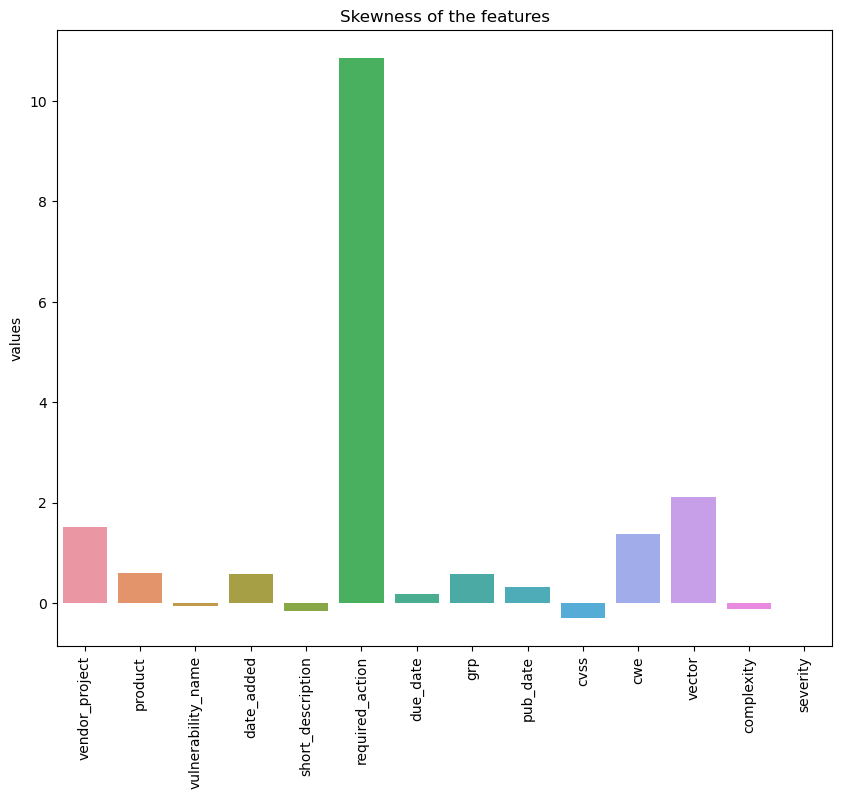

In [288]:
skew_1=pd.DataFrame(updated_df.skew())
skew_1.rename(columns={0:'values'},inplace=True)

plt.figure(figsize=(10,8))
sns.barplot(x=skew_1.index,y=skew_1['values'],data=skew_1)
plt.xticks(rotation=90)
plt.title('Skewness of the features')
plt.show()

In [289]:
corr=updated_df.corr()
corr

,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,grp,pub_date,cvss,cwe,vector,complexity,severity
vendor_project,1.000000,0.421795,0.285798,0.118515,0.245813,-0.021378,0.136687,0.118515,0.391095,0.131262,0.089255,-0.059052,-0.190052,-0.125481
product,0.421795,1.000000,0.632114,0.460333,0.559690,0.132652,0.516905,0.460333,0.533216,0.061073,0.066754,-0.122657,-0.089694,-0.041599
vulnerability_name,0.285798,0.632114,1.000000,0.859783,0.908623,0.122071,0.879348,0.859783,0.612002,-0.145622,0.193003,-0.010508,0.063521,0.105156
date_added,0.118515,0.460333,0.859783,1.000000,0.910475,0.151622,0.983305,1.000000,0.581928,-0.204249,0.184935,0.072042,0.144950,0.077043
short_description,0.245813,0.559690,0.908623,0.910475,1.000000,0.133715,0.931532,0.910475,0.661836,-0.169745,0.207195,0.054356,0.088423,0.086607
required_action,-0.021378,0.132652,0.122071,0.151622,0.133715,1.000000,0.140605,0.151622,0.147014,0.166900,0.038010,-0.056190,-0.152461,-0.129800
due_date,0.136687,0.516905,0.879348,0.983305,0.931532,0.140605,1.000000,0.983305,0.616364,-0.194619,0.175156,0.056953,0.123729,0.095405
grp,0.118515,0.460333,0.859783,1.000000,0.910475,0.151622,0.983305,1.000000,0.581928,-0.204249,0.184935,0.072042,0.144950,0.077043
pub_date,0.391095,0.533216,0.612002,0.581928,0.661836,0.147014,0.616364,0.581928,1.000000,0.024070,0.224545,0.025296,-0.071209,-0.037611
cvss,0.131262,0.061073,-0.145622,-0.204249,-0.169745,0.166900,-0.194619,-0.204249,0.024070,1.000000,-0.047468,-0.163616,-0.852060,-0.495945


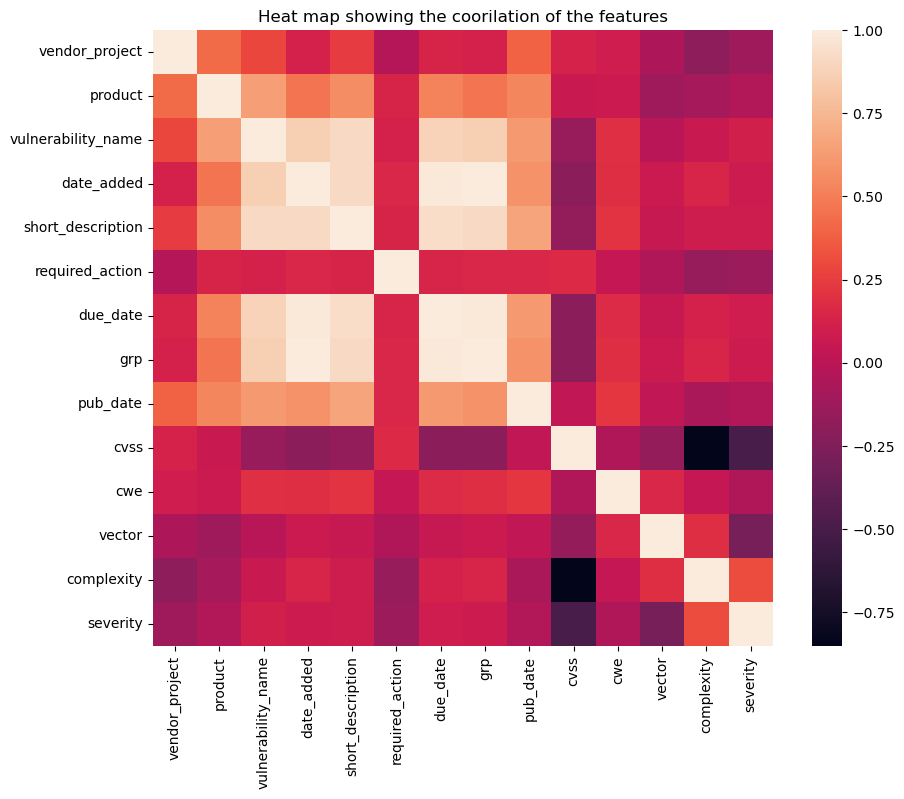

In [290]:
plt.figure(figsize=(10,8))
sns.heatmap(data=corr)
plt.title('Heat map showing the coorilation of the features')
plt.show()

In [291]:
from sklearn.cluster import KMeans

In [292]:
kmeans=KMeans(n_clusters=3, random_state=101)

In [293]:
kmeans.fit(updated_df)

KMeans(n_clusters=3, random_state=101)

In [294]:
updated_df['cluster']=kmeans.labels_

In [295]:
updated_df

,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,grp,pub_date,cvss,cwe,vector,complexity,severity,cluster
0,1,1,1,1,1,1,1,1,1,9.800000,1,1,1,1,1
1,1,1,1,1,2,1,1,1,1,7.800000,1,2,2,1,1
2,1,1,2,1,3,1,1,1,1,9.800000,2,1,1,1,1
3,1,1,3,1,4,1,1,1,1,9.800000,3,1,1,1,1
4,2,2,4,1,5,1,1,1,2,8.800000,4,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,32,64,117,1,121,1,1,1,92,7.500000,7,1,2,2,1
1102,62,160,259,3,283,1,12,3,196,8.209285,10,1,1,2,2
1103,32,79,424,20,470,1,38,20,92,7.500000,22,1,2,2,0
1104,13,223,360,17,397,1,34,17,266,6.903015,9,1,2,2,0


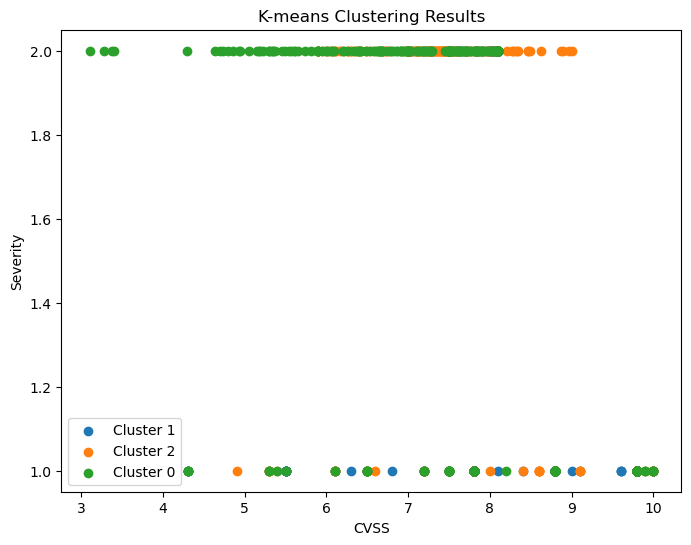

In [297]:
# Scatter plot of clusters
plt.figure(figsize=(8, 6))
for cluster in updated_df['cluster'].unique():
    plt.scatter(updated_df[updated_df['cluster'] == cluster]['cvss'], updated_df[updated_df['cluster'] == cluster]['severity'], label=f'Cluster {cluster}')
plt.xlabel('CVSS')
plt.ylabel('Severity')
plt.title('K-means Clustering Results')
plt.legend()
plt.show()


In [298]:
from sklearn.metrics import silhouette_score

In [301]:
features = updated_df.drop(columns='cluster')
cluster_labels = updated_df['cluster']

# Calculate the silhouette score
silhouette_avg = silhouette_score(features, cluster_labels)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4251701071386699
